# **ML Assignment 4**
## Name: Soumyadeep Ganguly
## Reg No: 24MDT0082


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Q1**

In [3]:
df = pd.read_csv('liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'liver_disease'],
      dtype='object')

In [5]:
df.drop(['Age', 'Gender'], axis=1, inplace=True)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)    
print(df_scaled)

[[0.00402145 0.         0.06057645 ... 0.52173913 0.24       1.        ]
 [0.14075067 0.2755102  0.31069858 ... 0.5        0.176      1.        ]
 [0.0924933  0.20408163 0.20859795 ... 0.52173913 0.236      1.        ]
 ...
 [0.00536193 0.00510204 0.0889106  ... 0.5        0.28       1.        ]
 [0.01206434 0.02040816 0.05911089 ... 0.54347826 0.28       1.        ]
 [0.0080429  0.01020408 0.07474353 ... 0.76086957 0.48       0.        ]]


In [7]:
X = df_scaled[:, :-1]
y = df_scaled[:, -1]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [10]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

0.7627118644067796


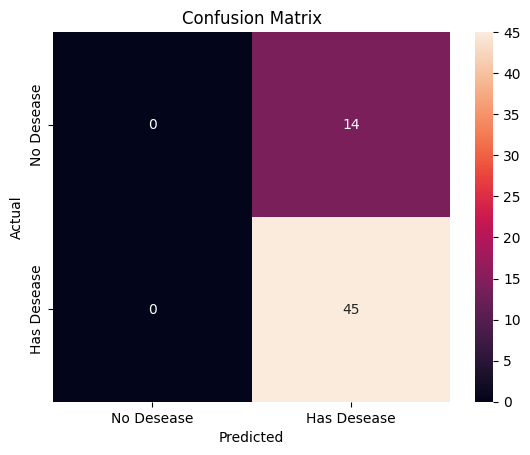

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, xticklabels=['No Desease', 'Has Desease'], yticklabels=['No Desease', 'Has Desease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Q2**

In [ ]:
from sklearn.datasets import make_classification 
X, y = make_classification(
    n_samples = 200,
    n_features = 3,
    n_informative = 3,
    n_redundant = 0,
    n_clusters_per_class = 1,
    class_sep=1.5,
    random_state = 42
)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [16]:
LR2 = LogisticRegression()
LR2.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = LR2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9


In [18]:
coef = LR2.coef_[0]
intercept = LR2.intercept_[0]
print(f'Coefficient: {coef}')
print(f'Intercept: {intercept}')

Coefficient: [ 3.44786906 -0.15460582  0.54363775]
Intercept: 0.9906768241834434


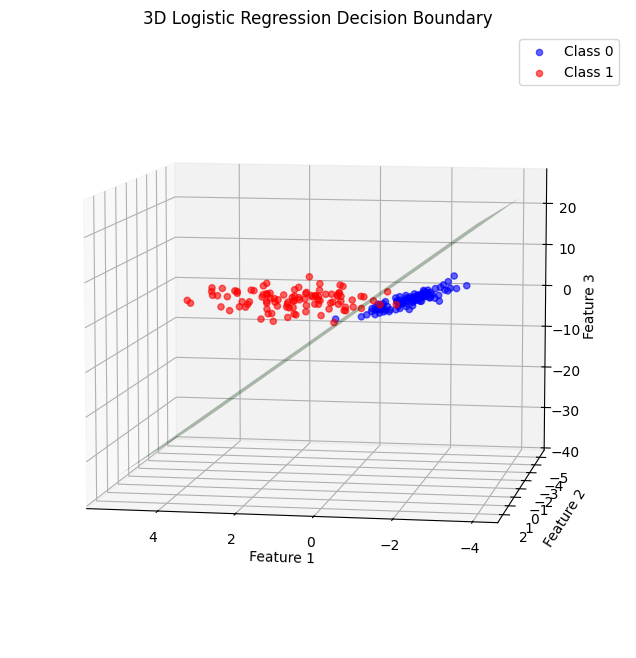

In [20]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y == 0, 0], X[y == 0, 1], X[y == 0, 2], color='blue', label='Class 0', alpha=0.6)
ax.scatter(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2], color='red', label='Class 1', alpha=0.6)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
zz = -(coef[0]*xx + coef[1]*yy + intercept) / coef[2]
ax.plot_surface(xx, yy, zz, color='green', alpha=0.3, edgecolor = 'none')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Logistic Regression Decision Boundary')
ax.legend()
ax.view_init(elev=8, azim=100)
plt.show()

# **Q3**

In [21]:
data = df[['Total_Bilirubin', 'Direct_Bilirubin', 'liver_disease']]
data.head(20)

,Total_Bilirubin,Direct_Bilirubin,liver_disease
0,0.7,0.1,1
1,10.9,5.5,1
2,7.3,4.1,1
3,1.0,0.4,1
4,3.9,2.0,1
5,1.8,0.7,1
6,0.9,0.2,1
7,0.9,0.3,1
8,0.9,0.3,0
9,0.7,0.2,1


In [22]:
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[0.00402145 0.         1.        ]
 [0.14075067 0.2755102  1.        ]
 [0.0924933  0.20408163 1.        ]
 ...
 [0.00536193 0.00510204 1.        ]
 [0.01206434 0.02040816 1.        ]
 [0.0080429  0.01020408 0.        ]]


In [24]:
X = scaled_data[:, :-1]
y = scaled_data[:, -1]

In [26]:
LR3 = LogisticRegression()
LR3.fit(X_train, y_train)

y_pred = LR3.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc_score}')

Accuracy: 0.9


In [27]:
coef = LR3.coef_[0]
intercept = LR3.intercept_
print(f'Coefficient: {coef}')
print(f'Intercept: {intercept}')

Coefficient: [ 3.44786906 -0.15460582  0.54363775]
Intercept: [0.99067682]


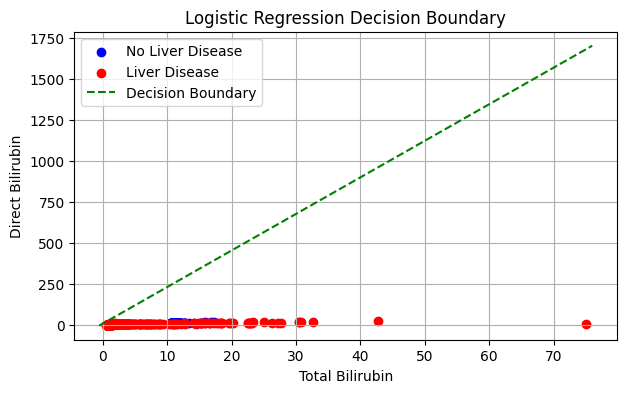

In [52]:
plt.figure(figsize=(7, 4))

plt.scatter(data['Total_Bilirubin'][data['liver_disease'] == 0]+10, 
            data['Direct_Bilirubin'][data['liver_disease'] == 0]+10, 
            color='blue', label='No Liver Disease')

plt.scatter(data['Total_Bilirubin'][data['liver_disease'] == 1], 
            data['Direct_Bilirubin'][data['liver_disease'] == 1], 
            color='red', label='Liver Disease')


x_min, x_max = data['Total_Bilirubin'].min() - 1, data['Total_Bilirubin'].max() + 1
x_values = np.linspace(x_min, x_max, 100)  
y_values = -(coef[0] * x_values + intercept) / coef[1]  


plt.plot(x_values, y_values, color='green', linestyle='--', label='Decision Boundary')

plt.xlabel('Total Bilirubin')
plt.ylabel('Direct Bilirubin')
plt.title('Logistic Regression Decision Boundary')


plt.legend()
plt.grid()


plt.show()


# **Q4**

In [39]:
df = df = pd.read_csv('liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [40]:
df = df.drop(columns=['Age', 'Gender'])

missing_values = df.isnull().sum()

df = df.fillna(df.median())

X = df.drop(columns=['liver_disease']).values  
y = df['liver_disease'].values 

In [41]:
# Normalize the feature values (Min-Max Scaling)
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Add bias term (column of ones)
X = np.c_[np.ones(X.shape[0]), X]  # Adding x0 = 1 for bias

# Convert y to 0 and 1 (if not already binary)
y = (y > 0).astype(int)

In [42]:
X.shape, y.shape

((583, 9), (583,))

In [44]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient Descent Algorithm
def gradient_descent(X, y, theta, alpha, epochs):
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        gradient = (1/m) * (X.T @ (sigmoid(X @ theta) - y))
        theta -= alpha * gradient 
        cost_history.append(compute_cost(X, y, theta))
    
    return theta, cost_history

In [45]:
theta = np.zeros(X.shape[1])  
alpha = 0.01  
epochs = 1000  

# Train the model
theta_optimal, cost_history = gradient_descent(X, y, theta, alpha, epochs)


final_cost = compute_cost(X, y, theta_optimal)
final_cost

np.float64(0.5964520453207424)

## Make Preiction

In [48]:
# Convert probabilities to binary values (0 or 1)
predictions = sigmoid(X @ theta_optimal) >= 0.5  

# Compute accuracy
accuracy = np.mean(predictions == y) * 100
accuracy

np.float64(71.35506003430532)

In [49]:
# Convert probabilities to binary values (0 or 1)
predictions = sigmoid(X @ theta_optimal) >= 0.5  

# Compute accuracy
accuracy = np.mean(predictions == y) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 71.36%
